# SALES PREDICTION

**One of the main application where the data science is used is in the field of Sales prediction. So intially we will import the necessary packages.**

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**Now we will read the data. I used kaggle to get the dataset. After reading the data we will get the details of the data and also check wether there are any null values in the dataset.**

In [2]:
data=pd.read_csv('advertising.xls')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.isnull().sum()*100

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Now we will plot the featues representing there effects on the resulting feature.**

/home/hafeeza/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hafeeza/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hafeeza/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


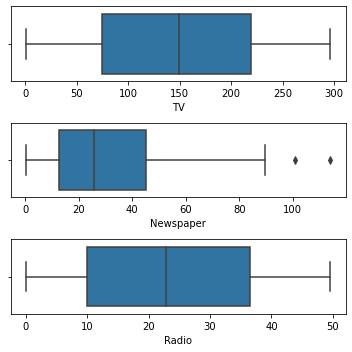

In [14]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

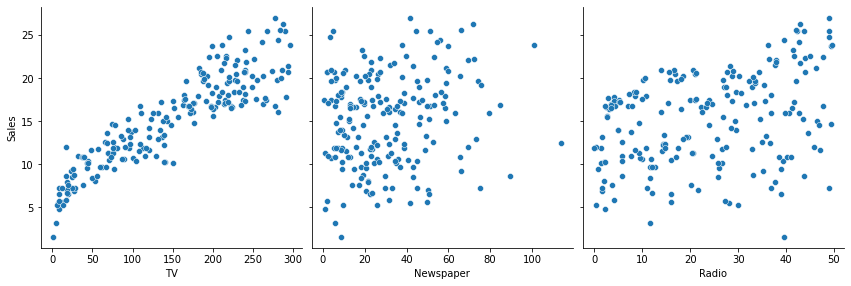

In [6]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

**We will derive a heat map to get the correlation between the features.**

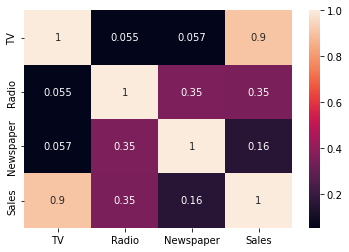

In [7]:
sns.heatmap(data.corr(),annot=True)
plt.show()

**After Analyzing the data now we will split the data for performing the training and testing methods for getting a model.**

In [8]:
x=data.iloc[:,0:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y=data.iloc[:,3]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=35)
xtrain

,TV,Radio,Newspaper
104,238.2,34.3,5.3
95,163.3,31.6,52.9
137,273.7,28.9,59.7
86,76.3,27.5,16.0
143,104.6,5.7,34.4
...,...,...,...
192,17.2,4.1,31.6
191,75.5,10.8,6.0
33,265.6,20.0,0.3
183,287.6,43.0,71.8


**Now we will develop a model to predict the results.**

In [11]:
import statsmodels.api as sm
xtrainsm=sm.add_constant(xtrain)
l=sm.OLS(ytrain,xtrainsm).fit()
l.params

const        4.633840
TV           0.054083
Radio        0.117208
Newspaper   -0.003458
dtype: float64

In [12]:
#The summary gives the overview of the model we developed.
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     570.9
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.05e-80
Time:                        21:02:31   Log-Likelihood:                -275.25
No. Observations:                 150   AIC:                             558.5
Df Residuals:                     146   BIC:                             570.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6338      0.316     14.674      0.000       4.010       5.258
TV             0.0541      0.001     36.456      0.000       0.051       0.057
Radio          0.1172      0.009     13.521      0.000       0.100       0.134
Newspaper     -0.0035      0.006     -0.585      0.560      -0.015       0.008
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.309
Skew:                          -0.111   Prob(JB):                        0.857
Kurtosis:                       2.988   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

InvalidIndexError: (slice(None, None, None), None)

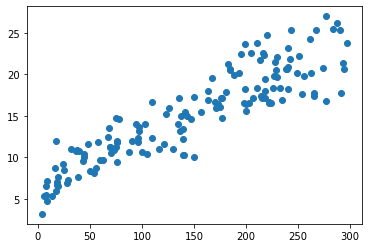

In [13]:
plt.scatter(xtrain['TV'], ytrain)
plt.plot(xtrain, 6.948 + 0.054*xtrain, 'r')
plt.show()

**We will now calculate the accuracy score, mean square error and r2 score to get the efficiency of the model we developed.**

In [16]:
X_test_sm = sm.add_constant(xtest)
ypred = l.predict(X_test_sm)

In [17]:
ypred.head()

136    10.557310
133    20.291737
130     9.283048
142    20.319333
154    17.230825
dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(ytest, ypred))

2.009723591747008

In [21]:
rsquare=r2_score(ytest,ypred)
rsquare

0.8254519456424798

# SUMMARY
**Hence we successfully developed models for sales prediction with a good accuracy.**